In [8]:
import requests
from bs4 import BeautifulSoup, Comment

url = 'https://www.thesouledstore.com/product/black-hoodie-women-oversized-hoodie?gte=2'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [11]:
def new_soup(url):
    scrapeops_response = requests.get(
        url='https://proxy.scrapeops.io/v1/',
        params={
            'api_key': "cc181578-e8f1-41c4-a421-a3161eb7b029",
            'url': url,
        },
    )
    scrapeops_response.raise_for_status()
    soup = BeautifulSoup(scrapeops_response.content, 'html.parser')
    return soup

soup = new_soup("https://www.thesouledstore.com/product/black-hoodie-women-oversized-hoodie?gte=2")

In [16]:
from selenium import webdriver

def setup_driver(url):
    driver = webdriver.Chrome()
    driver.get(url)
    print("Page opened")
    driver.implicitly_wait(10)
    return driver

def get_soup(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    return soup

driver = setup_driver("https://www.thesouledstore.com/product/black-hoodie-women-oversized-hoodie?gte=2")
soup = get_soup(driver)

Page opened


<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=061ad559e0f20e2da69a1d6ef87212e4">
  </script>
  <script async="" src="//amplify.outbrain.com/cp/obtp.js" type="text/javascript">
  </script>
  <script id="facebook-jssdk" src="https://connect.facebook.net/en_US/sdk.js">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-NXPBDLCSFK&amp;cx=c&amp;_slc=1" type="text/javascript">
  </script>
  <script async="" src="https://d2r1yp2w7bby2u.cloudfront.net/js/a.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/destination?id=AW-836942520&amp;l=dataLayer&amp;cx=c" type="text/javascript">
  </script>
  <script async="" src="https://bat.bing.com/bat.js" type="text/javascript">
  </script>
  <script async="" src="https://static.hotjar.com/c/hotjar-2590087.js?sv=7" type="text/javascript">
  </script>
  <script async="" src=
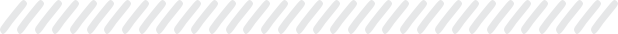
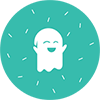
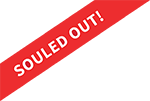
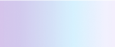

In [17]:
print(soup.prettify())

In [33]:
# Remove the head tag and all its contents
head_tag = soup.find('head')
if head_tag:
    head_tag.extract()

# Remove all script and style tags
for script in soup(["script", "style"]):
    script.extract()

# Remove all comments
for element in soup(text=lambda text: isinstance(text, Comment)):
    element.extract()

# Remove all class attributes from tags
for tag in soup.find_all(True):
    if tag.has_attr('class'):
        del tag['class']

prettify_soup = soup.prettify()

In [1]:
def clean_html(html):
    # Parse the HTML content
    soup = BeautifulSoup(html, 'html.parser')

    # Remove the head tag and all its contents
    head_tag = soup.find('head')
    if head_tag:
        head_tag.extract()

    # Remove all script and style tags
    for script in soup(["script", "style"]):
        script.extract()

    # Remove all comments
    for element in soup(text=lambda text: isinstance(text, Comment)):
        element.extract()

    # Remove all class attributes from tags
    for tag in soup.find_all(True):
        if tag.has_attr('class'):
            del tag['class']

    # Remove all id attributes from tags
    for tag in soup.find_all(True):
        if tag.has_attr('id'):
            del tag['id']

    # Remove all inline styles
    for tag in soup.find_all(True):
        if tag.has_attr('style'):
            del tag['style']

    # Remove all empty tags
    for tag in soup.find_all():
        if not tag.contents:
            tag.extract()

    # Remove all unwanted tags (customize as needed)
    unwanted_tags = ['header', 'footer', 'nav', 'aside', 'svg']
    for tag in soup.find_all(unwanted_tags):
        tag.extract()

    # Prettify the cleaned HTML
    cleaned_html = soup.prettify()

    return cleaned_html

In [46]:
import tiktoken

text = clean_html(response.text)
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
token_count = len(encoding.encode(text))
print(f"The text contains {token_count} tokens.")

The text contains 9112 tokens.


In [47]:
#put the html into a file
with open('the-outrage.html', 'w', encoding="utf-8") as file:
    file.write(text)

In [52]:
from markdownify import MarkdownConverter
import re


def remove_redundant_newlines(markdown_text_):
    # Remove consecutive newlines with more than 2 occurrences
    markdown_text_ = re.sub(r'\n{3,}', '\n\n', markdown_text_)

    # Remove leading and trailing newlines
    markdown_text_ = markdown_text_.strip('\n')

    return markdown_text_


markdown = MarkdownConverter()
markdown_text = markdown.convert(text)
cleaned_markdown = remove_redundant_newlines(markdown_text)
cleaned_markdown

" Incredible growth solutions I.\n \n (United Kingdom)\n \n Just made someone's day with this gift\n \n\n|  |  |  |\n| --- | --- | --- |\n| \n\n Free Delivery\n \n - No Hidden Costs\n \n\n | \n\n 5 Star\n \n Customer\n \n Service\n \n | \n\n Send To\n \n Multiple Addresses\n \n |\n\n Launch Live Ajax Search\n \n\n* [Home](https://www.gifthampersuk.co.uk/index.php?route=common/home)\n* [Chocolate Mountain Gift Hamper](https://www.gifthampersuk.co.uk/chocolate-mountain-gift-hamper-uk)\n\n Chocolate Mountain Gift Hamper\n================================\n\n rating\n \n\n* Product Code:\n \n SOH: H23132 - Chocolate Tower\n* Availability:\n \n In Stock\n\n* £59.00\n\n (includes all shipping and taxes)\n \n\n Every order supports\n St Leonard's Hospice\n \n\n Save for Later\n \n |\n [view all saved](/index.php?route=product/compare) \n\n* Price in reward points:\n \n\n 59\n\n Free Delivery\\*\n \n[view details](/catalog/view/theme/gifthampers/template/includes/product-message-shipping-includ

In [54]:
print(cleaned_markdown)

 Incredible growth solutions I.
 
 (United Kingdom)
 
 Just made someone's day with this gift
 

|  |  |  |
| --- | --- | --- |
| 

 Free Delivery
 
 - No Hidden Costs
 

 | 

 5 Star
 
 Customer
 
 Service
 
 | 

 Send To
 
 Multiple Addresses
 
 |

 Launch Live Ajax Search
 

* [Home](https://www.gifthampersuk.co.uk/index.php?route=common/home)
* [Chocolate Mountain Gift Hamper](https://www.gifthampersuk.co.uk/chocolate-mountain-gift-hamper-uk)

 Chocolate Mountain Gift Hamper

 rating
 

* Product Code:
 
 SOH: H23132 - Chocolate Tower
* Availability:
 
 In Stock

* £59.00

 (includes all shipping and taxes)
 

 Every order supports
 St Leonard's Hospice
 

 Save for Later
 
 |
 [view all saved](/index.php?route=product/compare) 

* Price in reward points:
 

 59

 Free Delivery\*
 
[view details](/catalog/view/theme/gifthampers/template/includes/product-message-shipping-included-uk.php) 

 Indulge in a heavenly ascent of flavor with our 'Chocolate Mountain' hamper. This sweet treat